In [204]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from datetime import datetime

x, y, t = [], [], []
for m in xrange(1, 13):
    src = np.load('../data/datasets/seville-sn-1-2017%02d21.npz' % m)
    x.append(src['x'])
    y.append(src['y'])
    t.append(src['t'])
x = np.array(x)
y = np.array(y)
t = np.array(t)
print x.shape, y.shape, t.shape, x[0].shape, y[0].shape, t[0].shape
print x[0].min(), x[0].max()

(12,) (12,) (12,) (7560, 2) (7560,) (7560,)
-3.00041443506 9.40250011731


In [205]:
def time2area(tt):
    s = tt.second / 60.
    m = tt.minute / 60.
    h = tt.hour / 12.
    return h + .1 * m + .01 * s

print "Example:", t[0][0].time(), t[0][0].hour, t[0][0].minute, t[0][0].second, time2area(t[0][0])

Example: 07:34:18.578049 7 34 18 0.643


In [206]:
for m in xrange(12):
    t[m] = np.array([(time2area(datetime(2017, 6, 21, 12, 0, 0)) - time2area(tt)) for tt in t[m]])

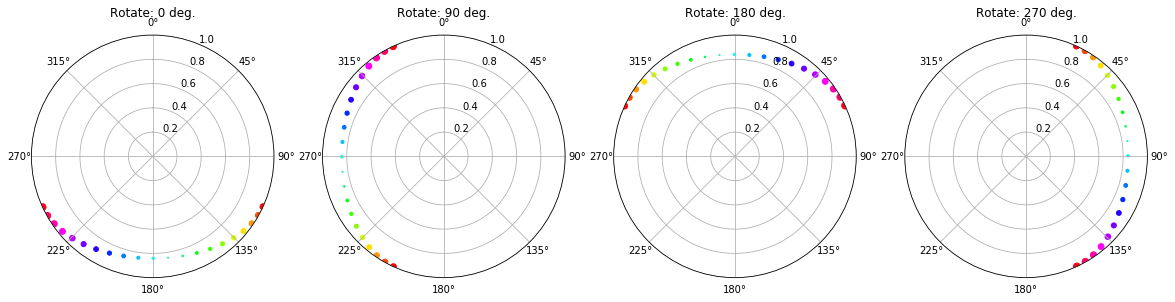

In [207]:
m = 1
plt.figure(1, figsize=(20, 5))
rot = 0
# print x[y==rot]
ax = plt.subplot(141, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 0 deg.")
rot = 90
ax = plt.subplot(142, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 90 deg.")
rot = 180
ax = plt.subplot(143, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 180 deg.")
rot = 270
ax = plt.subplot(144, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=np.arange((y[m-1]==rot).sum()), cmap=cmx.hsv)
plt.ylim([0, 1])
plt.title("Rotate: 270 deg.")
plt.show()

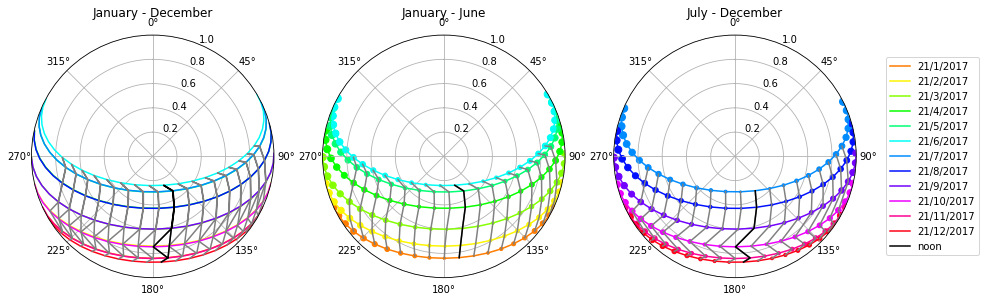

In [208]:
plt.figure(1, figsize=(20, 5))
rot = 0

ax = plt.subplot(141, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
n, ns = [], []
for m in xrange(1, 13):
    plt.plot(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.), label="21/%0d/2017" % m)
    i = np.argmin(np.abs(t[m-1][y[m-1]==rot]))
    n.append(x[m-1][y[m-1]==rot][i])
    ns.append(x[m-1][y[m-1]==rot][i-8:i+9])
n = np.array(n)
ns = np.array(ns)
for i in xrange(ns.shape[1]):
    plt.plot(ns[:, i, 0], np.sin(ns[:, i, 1]), color='grey')
plt.plot(n[:, 0], np.sin(n[:, 1]), color='k', label="noon")
plt.ylim([0, 1])
plt.title("January - December")
plt.legend(loc="center left", bbox_to_anchor=(3.5, .5))

ax = plt.subplot(142, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
for m in xrange(1, 7):
    plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=cmx.hsv(m/12.), cmap=cmx.hsv)
    plt.plot(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.))
for i in xrange(ns.shape[1]):
    plt.plot(ns[:6, i, 0], np.sin(ns[:6, i, 1]), color='grey')
plt.plot(n[:6, 0], np.sin(n[:6, 1]), color='k')
plt.ylim([0, 1])
plt.title("January - June")

ax = plt.subplot(143, polar=True)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi/2)
for m in xrange(7, 13):
    plt.scatter(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]),
            s=100 * np.abs(t[m-1][y[m-1]==rot]), c=cmx.hsv(m/12.), cmap=cmx.hsv)
    plt.plot(x[m-1][y[m-1]==rot][:, 0], np.sin(x[m-1][y[m-1]==rot][:, 1]), color=cmx.hsv(m/12.))
for i in xrange(ns.shape[1]):
    plt.plot(ns[6:, i, 0], np.sin(ns[6:, i, 1]), color='grey')
plt.plot(n[6:, 0], np.sin(n[6:, 1]), color='k')
plt.ylim([0, 1])
plt.title("July - December")
plt.show()

In [209]:
xx = np.concatenate(x, axis=0)
yy = np.concatenate(y, axis=0)
tt = np.concatenate(t, axis=0)

print xx.shape, yy.shape, tt.shape

(108000, 2) (108000,) (108000,)


In [210]:
xxx = np.concatenate((xx % (2 * np.pi), tt[:, np.newaxis], np.deg2rad(yy[:, np.newaxis])), axis=-1)
print xxx.shape
print xxx.min(axis=0)
print xxx.max(axis=0)

(108000, 4)
[  2.89536002e-05   2.45134072e-01  -6.39833333e-01   0.00000000e+00]
[ 6.28310846  1.57552542  0.57683333  6.26573201]


In [211]:
mu = xxx.mean(axis=0)
C = (xxx-mu).T.dot(xxx-mu) / xxx.shape[0]

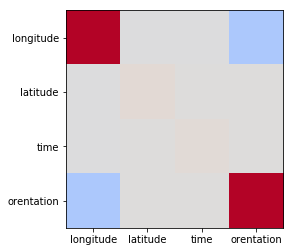

In [212]:
plt.figure(1)
plt.imshow(C, vmin=-3, vmax=3, cmap="coolwarm")
# plt.colorbar()
plt.xticks([0, 1, 2, 3], ["longitude", "latitude", "time", "orentation"])
plt.yticks([0, 1, 2, 3], ["longitude", "latitude", "time", "orentation"])
plt.show()

In [213]:
import sys
import os
sys.path.append(os.path.abspath("../"))

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neural_network import MLPRegressor
from learn import angdist

ln = LinearRegression(n_jobs=3)
lg = LogisticRegression(n_jobs=3, max_iter=500, multi_class='multinomial', solver='sag')
nn = MLPRegressor(hidden_layer_sizes=(360,), activation='logistic', alpha=1e-4, solver='adam', max_iter=500)

ln.fit(xxx[:, :3], xxx[:, 3])
p_ln = ln.predict(xxx[:, :3])
acc_ln = 1 - angdist(xxx[:, 3], p_ln).mean() / np.pi
print "Linear Regression   - Accuracy:", acc_ln

lg.fit(xxx[:, :3], np.int32(np.rad2deg(xxx[:, 3])))
p_lg = np.deg2rad(lg.predict(xxx[:, :3]))
acc_lg = 1 - angdist(xxx[:, 3], p_lg).mean() / np.pi
print "Logistic Regression - Accuracy:", acc_lg

nn.fit(xxx[:, :3], xxx[:, 3])
p_nn = nn.predict(xxx[:, :3])
acc_nn = 1 - angdist(xxx[:, 3], p_nn).mean() / np.pi
print "Neural Network      - Accuracy:", acc_nn

Linear Regression   - Accuracy: 0.53422464517
Logistic Regression - Accuracy: 0.593684867446
Neural Network      - Accuracy: 0.535405286788


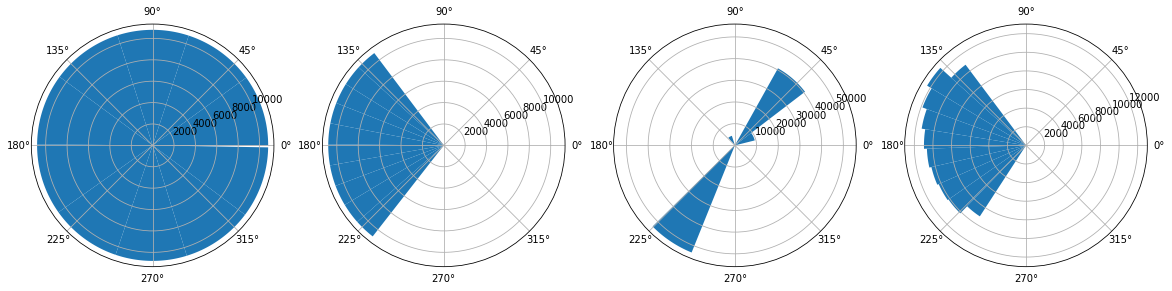

In [214]:
plt.figure(1, figsize=(20, 5))
plt.subplot(141, polar=True)
plt.hist(xxx[:, 3])
plt.subplot(142, polar=True)
plt.hist(p_ln)
plt.subplot(143, polar=True)
plt.hist(p_lg)
plt.subplot(144, polar=True)
plt.hist(p_nn)
plt.show()

In [215]:
ln.fit(xxx[:, :2], xxx[:, 3])
p_ln = ln.predict(xxx[:, :2])
acc_ln = 1 - angdist(xxx[:, 3], p_ln).mean() / np.pi
print "Linear Regression   - Accuracy:", acc_ln

lg.fit(xxx[:, :2], np.int32(np.rad2deg(xxx[:, 3])))
p_lg = np.deg2rad(lg.predict(xxx[:, :2]))
acc_lg = 1 - angdist(xxx[:, 3], p_lg).mean() / np.pi
print "Logistic Regression - Accuracy:", acc_lg

nn.fit(xxx[:, :2], xxx[:, 3])
p_nn = nn.predict(xxx[:, :2])
acc_nn = 1 - angdist(xxx[:, 3], p_nn).mean() / np.pi
print "Neural Network      - Accuracy:", acc_nn

Linear Regression   - Accuracy: 0.534227324149
Logistic Regression - Accuracy: 0.593686307775
Neural Network      - Accuracy: 0.534045677106


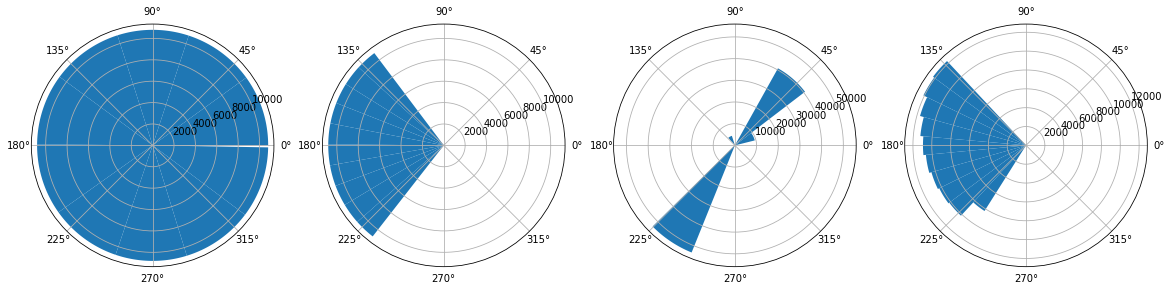

In [216]:
plt.figure(1, figsize=(20, 5))
plt.subplot(141, polar=True)
plt.hist(xxx[:, 3])
plt.subplot(142, polar=True)
plt.hist(p_ln)
plt.subplot(143, polar=True)
plt.hist(p_lg)
plt.subplot(144, polar=True)
plt.hist(p_nn)
plt.show()

In [217]:
x_train = xxx[xxx[:, 2] >= 0, :2]
y_train = xxx[xxx[:, 2] >= 0, 3]
ln.fit(x_train, y_train)
p_ln = ln.predict(x_train)
acc_ln = 1 - angdist(y_train, p_ln).mean() / np.pi
print "Linear Regression   - Accuracy:", acc_ln

lg.fit(x_train, np.int32(np.rad2deg(y_train)))
p_lg = np.deg2rad(lg.predict(x_train))
acc_lg = 1 - angdist(y_train, p_lg).mean() / np.pi
print "Logistic Regression - Accuracy:", acc_lg

nn.fit(x_train, y_train)
p_nn = nn.predict(x_train)
acc_nn = 1 - angdist(y_train, p_nn).mean() / np.pi
print "Neural Network      - Accuracy:", acc_nn

Linear Regression   - Accuracy: 0.526873508932
Logistic Regression - Accuracy: 0.69092136166
Neural Network      - Accuracy: 0.772506110382


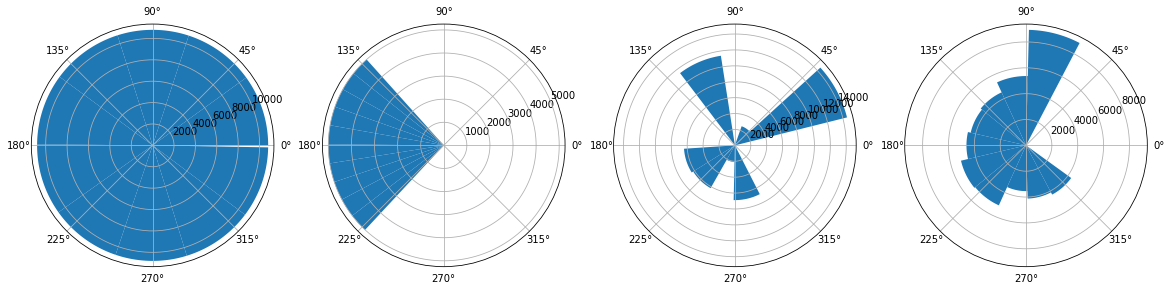

In [218]:
plt.figure(1, figsize=(20, 5))
plt.subplot(141, polar=True)
plt.hist(xxx[:, 3])
plt.subplot(142, polar=True)
plt.hist(p_ln)
plt.subplot(143, polar=True)
plt.hist(p_lg)
plt.subplot(144, polar=True)
plt.hist(p_nn)
plt.show()

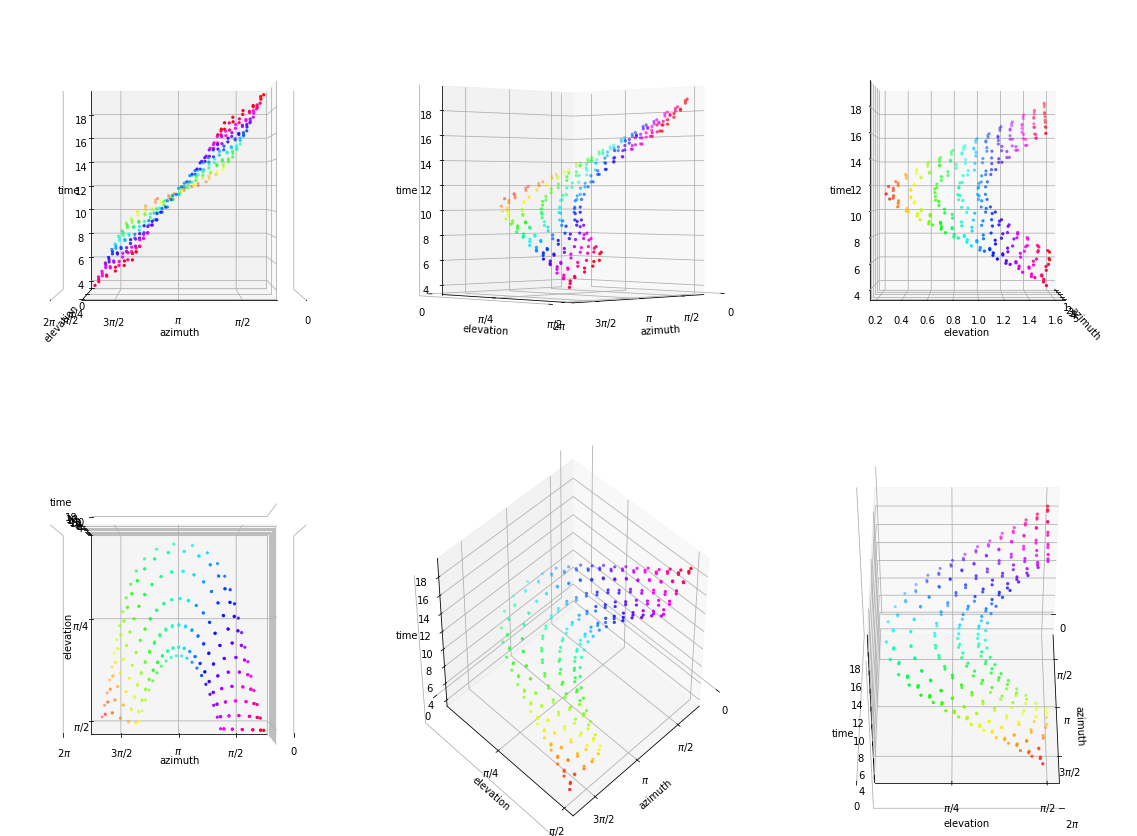

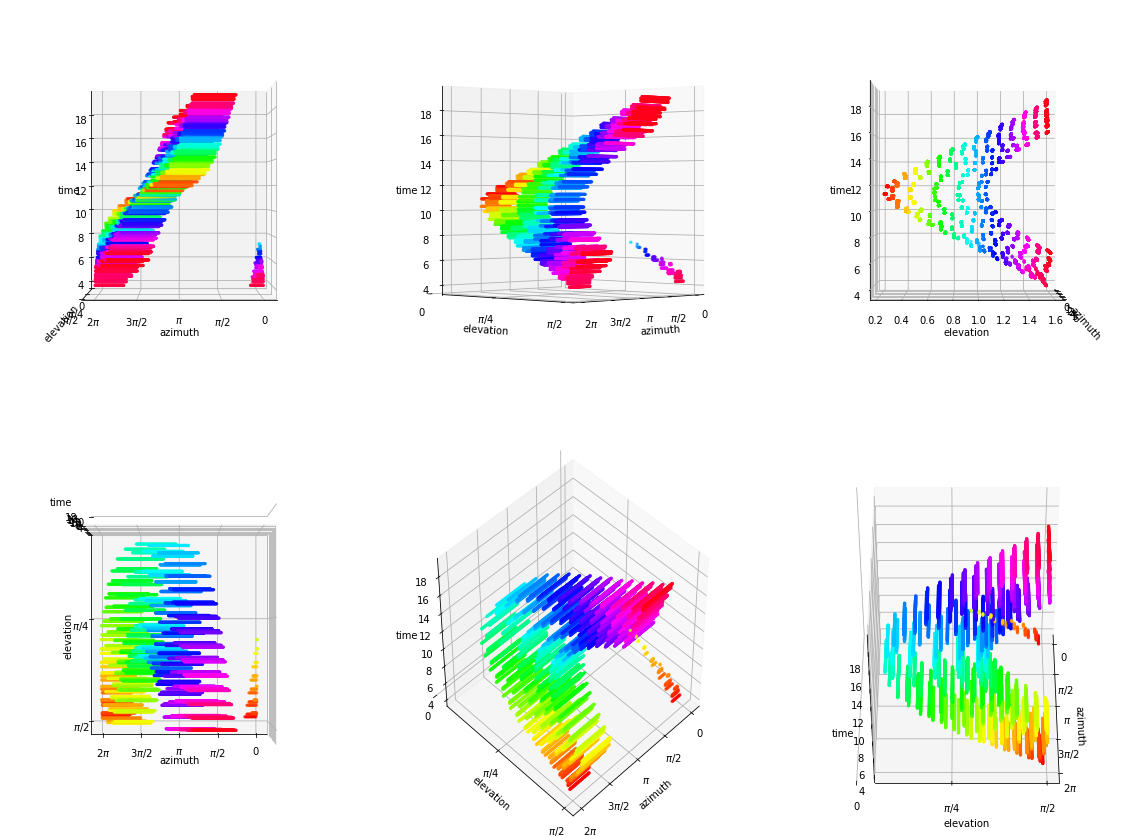

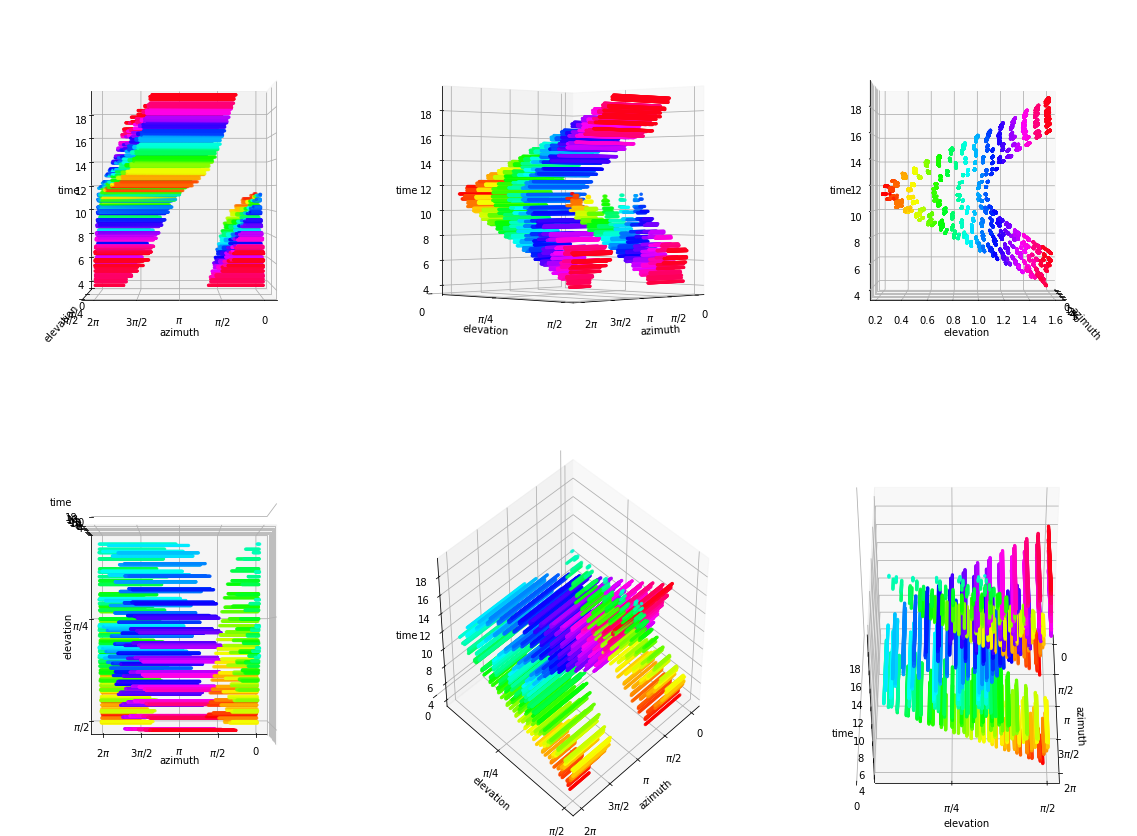

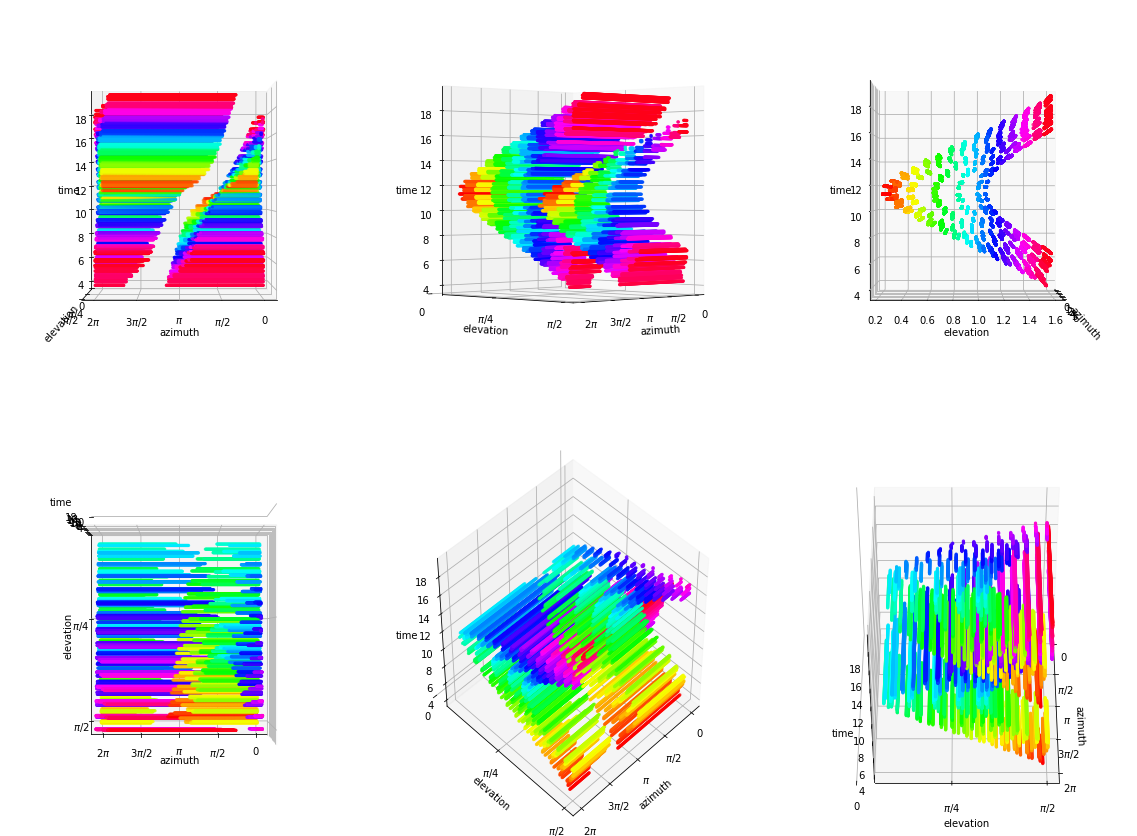

In [195]:
from mpl_toolkits.mplot3d import Axes3D

for i in xrange(4):
    angs = 90 * i
    if angs == 0:
        angs = 1
    plt.figure(i+1, figsize=(20, 15))
    ax = plt.subplot(231, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 1][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax.set_xticklabels(["0", u'$\pi/2$', u'$\pi$', u'$3 \pi/2$', '$2 \pi$'])
    ax.set_yticks([0, np.pi/4, np.pi/2])
    ax.set_yticklabels(["0", u'$\pi/4$', u'$\pi/2$'])
    ax.view_init(0, 90)
    ax = plt.subplot(232, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 1][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax.set_xticklabels(["0", u'$\pi/2$', u'$\pi$', u'$3 \pi/2$', '$2 \pi$'])
    ax.set_yticks([0, np.pi/4, np.pi/2])
    ax.set_yticklabels(["0", u'$\pi/4$', u'$\pi/2$'])
    ax.view_init(0, 45)
    ax = plt.subplot(233, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 1][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.view_init(0, 0)
    ax = plt.subplot(234, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 2][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax.set_xticklabels(["0", u'$\pi/2$', u'$\pi$', u'$3 \pi/2$', '$2 \pi$'])
    ax.set_yticks([0, np.pi/4, np.pi/2])
    ax.set_yticklabels(["0", u'$\pi/4$', u'$\pi/2$'])
    ax.view_init(90, 90)
    ax = plt.subplot(235, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 2][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax.set_xticklabels(["0", u'$\pi/2$', u'$\pi$', u'$3 \pi/2$', '$2 \pi$'])
    ax.set_yticks([0, np.pi/4, np.pi/2])
    ax.set_yticklabels(["0", u'$\pi/4$', u'$\pi/2$'])
    ax.view_init(45, 45)
    ax = plt.subplot(236, projection='3d')
    ax.scatter3D([xxx[:, 0][ang::360] for ang in range(angs)],
                 [xxx[:, 1][ang::360] for ang in range(angs)],
                 [12 * xxx[:, 2][ang::360] + 12 for ang in range(angs)],
                 marker='.', c=[xxx[:, 2][ang::360] for ang in range(angs)], cmap='hsv')
    ax.set_xlabel("azimuth")
    ax.set_ylabel("elevation")
    ax.set_zlabel("time")
    ax.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
    ax.set_xticklabels(["0", u'$\pi/2$', u'$\pi$', u'$3 \pi/2$', '$2 \pi$'])
    ax.set_yticks([0, np.pi/4, np.pi/2])
    ax.set_yticklabels(["0", u'$\pi/4$', u'$\pi/2$'])
    ax.view_init(45, 0)
plt.show()